In [2]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model,save_model

In [3]:
train_dir='/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training'

In [3]:
test_dir='/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test'

In [4]:
root='/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training'
l=[]

for i in os.walk(root):
    if(i[0]==root):
        continue
    l.append((i[0].split('/')[7],len(i[2])))
l

[('Quince', 490),
 ('Grapefruit White', 492),
 ('Granadilla', 490),
 ('Orange', 479),
 ('Apple Red 3', 429),
 ('Grape White 2', 490),
 ('Corn Husk', 462),
 ('Tamarillo', 490),
 ('Banana Red', 490),
 ('Nectarine Flat', 480),
 ('Pepper Yellow', 666),
 ('Nut Forest', 654),
 ('Pear Monster', 490),
 ('Fig', 702),
 ('Tomato Heart', 684),
 ('Onion Red Peeled', 445),
 ('Lemon Meyer', 490),
 ('Onion Red', 450),
 ('Passion Fruit', 490),
 ('Cucumber Ripe', 392),
 ('Cactus fruit', 490),
 ('Tomato not Ripened', 474),
 ('Mango Red', 426),
 ('Apple Pink Lady', 456),
 ('Pomegranate', 492),
 ('Plum', 447),
 ('Pineapple', 490),
 ('Tomato 1', 738),
 ('Cherry 2', 738),
 ('Apple Red 2', 492),
 ('Avocado ripe', 491),
 ('Dates', 490),
 ('Maracuja', 490),
 ('Papaya', 492),
 ('Nut Pecan', 534),
 ('Pear Stone', 711),
 ('Cherry Wax Yellow', 492),
 ('Eggplant', 468),
 ('Apple Golden 2', 492),
 ('Guava', 490),
 ('Beetroot', 450),
 ('Tomato Maroon', 367),
 ('Potato Red', 450),
 ('Apple Red Delicious', 490),
 ('Cher

In [4]:
height=100
width=100

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    vertical_flip = True,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
    )

In [6]:
train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(width, height),
        batch_size=32,
        seed=99,
        subset='training',
        shuffle=True
    )

Found 54190 images belonging to 131 classes.


In [10]:
train_generator.class_indices.keys()

dict_keys(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracu

In [7]:
valid_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(width, height),
        batch_size=32,
        seed=99,
        subset='validation',
        shuffle=True
    )

Found 13502 images belonging to 131 classes.


In [8]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory=test_dir,
        target_size=(width, height))


Found 22688 images belonging to 131 classes.


**Model with 1 conv layer**

Epoch 1/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.7039 - loss: 1.3787 - val_accuracy: 0.9133 - val_loss: 0.3011
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.9850 - loss: 0.0594 - val_accuracy: 0.9203 - val_loss: 0.2829
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9917 - loss: 0.0308 - val_accuracy: 0.9237 - val_loss: 0.2805
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9912 - loss: 0.0360 - val_accuracy: 0.9137 - val_loss: 0.3479
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9915 - loss: 0.0328 - val_accuracy: 0.9213 - val_loss: 0.3191
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accuracy: 0.9310 - val_loss: 0.3173
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9965 - loss: 0.0129 - val_accuracy: 0.9424 - val_loss: 0.2200
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9993 -

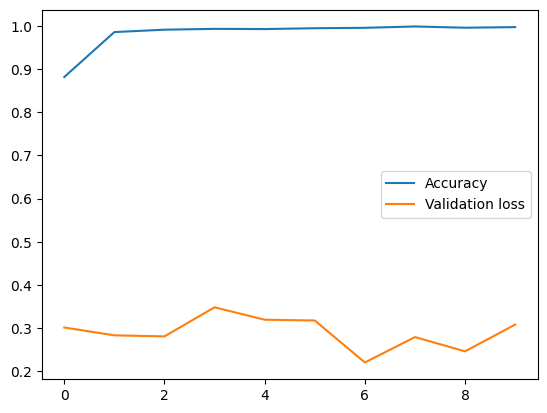

In [29]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [31]:
model.save("model-1conv.h5")

from IPython.display import FileLink

FileLink(r'model-1conv.h5')

/kaggle/working/model-1conv.h5

**Model with 2 conv layers**

Epoch 1/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.7153 - loss: 1.2090 - val_accuracy: 0.9014 - val_loss: 0.3493
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9830 - loss: 0.0722 - val_accuracy: 0.9203 - val_loss: 0.2859
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9908 - loss: 0.0381 - val_accuracy: 0.9511 - val_loss: 0.1893
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.9900 - loss: 0.0827 - val_accuracy: 0.9606 - val_loss: 0.1780
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9939 - loss: 0.0492 - val_accuracy: 0.9608 - val_loss: 0.1895
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9972 - loss: 0.0126 - val_accuracy: 0.9380 - val_loss: 0.3210
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9955 - loss: 0.0394 - val_accuracy: 0.9478 - val_loss: 0.2986
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.9967 -

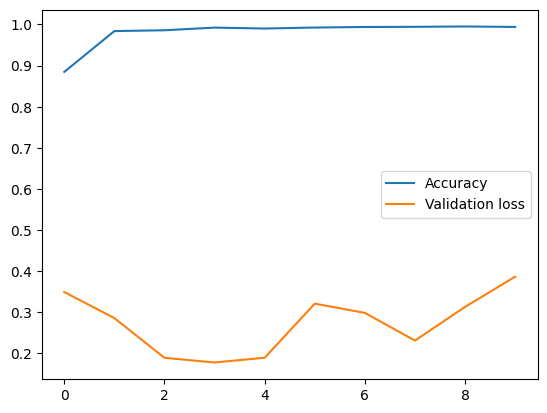

In [12]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [13]:
model.save("model-2conv.h5")

In [20]:
from IPython.display import FileLink

FileLink(r'model-2conv.h5')

/kaggle/working/model-2conv.h5

**Model with 3 conv layers**

Epoch 1/20
   6/1694 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.0064 - loss: 5.2070    

W0000 00:00:1719551514.060963     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1376/1694 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5687 - loss: 1.7644

W0000 00:00:1719551561.880611     191 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.6055 - loss: 1.6120 - val_accuracy: 0.8490 - val_loss: 0.9837
Epoch 2/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step - accuracy: 0.9097 - loss: 0.6780 - val_accuracy: 0.8951 - val_loss: 1.1706
Epoch 3/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9462 - loss: 0.6616 - val_accuracy: 0.9211 - val_loss: 2.0049
Epoch 4/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9694 - loss: 0.7240 - val_accuracy: 0.9208 - val_loss: 3.3546
Epoch 5/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9735 - loss: 0.6387 - val_accuracy: 0.8926 - val_loss: 5.8160
Epoch 6/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.9555 - loss: 1.9554 - val_accuracy: 0.9416 - val_loss: 3.0207
Epoch 7/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9830 - loss: 0.6845 - val_accuracy: 0.8939 - val_loss: 11.1376
Epoch 8/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9814 - loss: 1.2

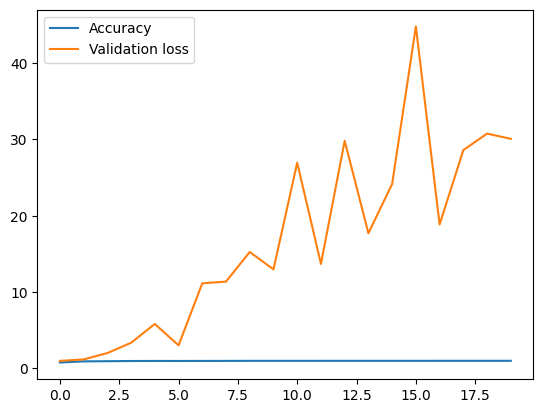

In [17]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=20
)

model.evaluate(test_generator)


plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [19]:
model.save("model-3conv.h5")

In [21]:
from IPython.display import FileLink

FileLink(r'model-3conv.h5')

/kaggle/working/model-3conv.h5

**Model with 4 conv layers**

Epoch 1/20
   6/1694 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.0019 - loss: 4.8602    

W0000 00:00:1719556648.918363     191 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1687/1694 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6019 - loss: 1.6157

W0000 00:00:1719556712.712295     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6029 - loss: 1.6115 - val_accuracy: 0.8534 - val_loss: 0.5171
Epoch 2/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9663 - loss: 0.1331 - val_accuracy: 0.9279 - val_loss: 0.3094
Epoch 3/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9791 - loss: 0.0750 - val_accuracy: 0.9368 - val_loss: 0.2161
Epoch 4/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9779 - loss: 0.0944 - val_accuracy: 0.9123 - val_loss: 0.3988
Epoch 5/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.9823 - loss: 0.0731 - val_accuracy: 0.9446 - val_loss: 0.2355
Epoch 6/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9861 - loss: 0.0558 - val_accuracy: 0.9281 - val_loss: 0.3757
Epoch 7/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9894 - loss: 0.0483 - val_accuracy: 0.9148 - val_loss: 0.4663
Epoch 8/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.9839 - loss: 0.07

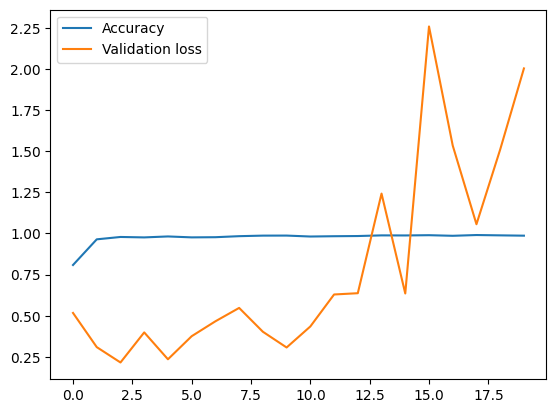

In [22]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=20
)

model.evaluate(test_generator)


plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [ ]:
model.save("model-4conv.h5")

In [ ]:
from IPython.display import FileLink

FileLink(r'model-4conv.h5')

**Model with 5 conv layers**

Epoch 1/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.5079 - loss: 1.9855 - val_accuracy: 0.8351 - val_loss: 0.6467
Epoch 2/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9408 - loss: 0.2328 - val_accuracy: 0.9197 - val_loss: 0.3220
Epoch 3/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.9692 - loss: 0.1167 - val_accuracy: 0.9057 - val_loss: 0.3377
Epoch 4/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.9765 - loss: 0.0917 - val_accuracy: 0.9562 - val_loss: 0.1642
Epoch 5/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9883 - loss: 0.0399 - val_accuracy: 0.8570 - val_loss: 0.5726
Epoch 6/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.9681 - loss: 0.1662 - val_accuracy: 0.9463 - val_loss: 0.1879
Epoch 7/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9440 - loss: 0.5163 - val_accuracy: 0.9310 - val_loss: 0.3621
Epoch 8/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9764 -

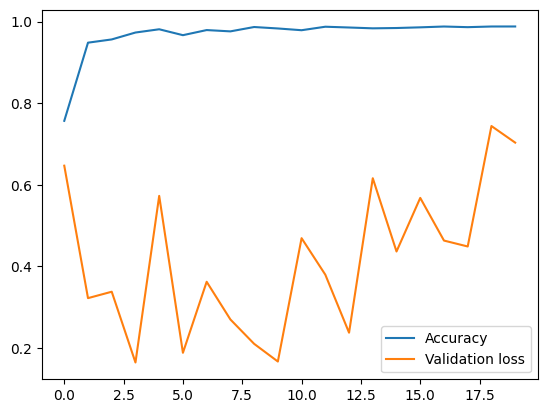

In [24]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=20
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [25]:
model.save("model-5conv.h5")

**Model with 6 conv layers**

Epoch 1/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.4019 - loss: 2.4966 - val_accuracy: 0.8728 - val_loss: 0.4591
Epoch 2/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.9256 - loss: 0.2746 - val_accuracy: 0.8846 - val_loss: 0.4104
Epoch 3/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9322 - loss: 0.2967 - val_accuracy: 0.8834 - val_loss: 0.4809
Epoch 4/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9651 - loss: 0.1399 - val_accuracy: 0.9023 - val_loss: 0.4204
Epoch 5/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9731 - loss: 0.1687 - val_accuracy: 0.9008 - val_loss: 0.4833
Epoch 6/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9619 - loss: 0.3911 - val_accuracy: 0.9003 - val_loss: 0.5000
Epoch 7/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9739 - loss: 0.1534 - val_accuracy: 0.9156 - val_loss: 0.4677
Epoch 8/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.9672 -

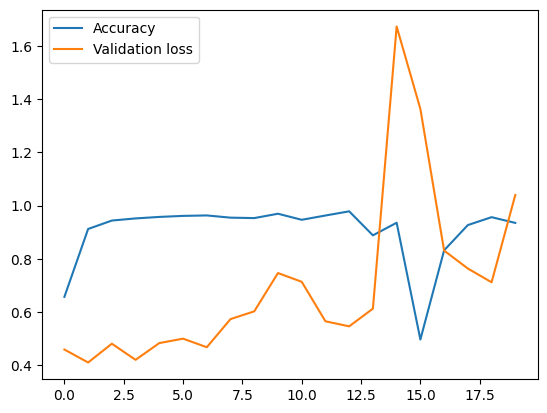

In [26]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=20
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv with leaky relu**

Epoch 1/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 91s 53ms/step - accuracy: 0.6582 - loss: 2.2049 - val_accuracy: 0.8148 - val_loss: 0.7110
Epoch 2/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9325 - loss: 0.2424 - val_accuracy: 0.8868 - val_loss: 0.6819
Epoch 3/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9630 - loss: 0.1531 - val_accuracy: 0.8565 - val_loss: 1.2359
Epoch 4/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9606 - loss: 0.1989 - val_accuracy: 0.8745 - val_loss: 1.3660
Epoch 5/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9677 - loss: 0.1863 - val_accuracy: 0.9182 - val_loss: 0.8734
Epoch 6/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9758 - loss: 0.1601 - val_accuracy: 0.8875 - val_loss: 1.3600
Epoch 7/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9788 - loss: 0.1405 - val_accuracy: 0.9028 - val_loss: 1.6889
Epoch 8/20
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9838 -

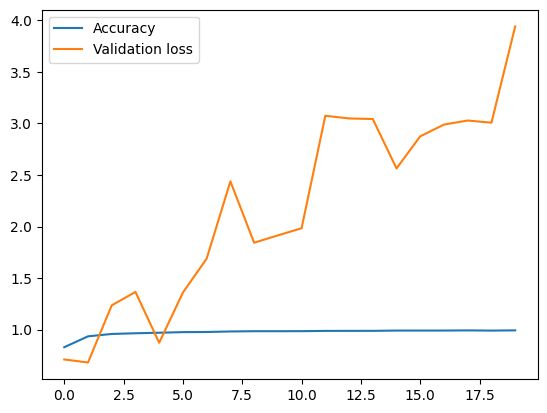

In [35]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='leaky_relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=20
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv with 8**

Epoch 1/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.6287 - loss: 1.8185 - val_accuracy: 0.9290 - val_loss: 0.2525
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9813 - loss: 0.0779 - val_accuracy: 0.9336 - val_loss: 0.2364
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.9882 - loss: 0.0464 - val_accuracy: 0.9438 - val_loss: 0.1649
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9928 - loss: 0.0297 - val_accuracy: 0.9465 - val_loss: 0.2133
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 72s 43ms/step - accuracy: 0.9932 - loss: 0.0262 - val_accuracy: 0.9137 - val_loss: 0.3673
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.9945 - loss: 0.0208 - val_accuracy: 0.9160 - val_loss: 0.3327
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.9966 - loss: 0.0128 - val_accuracy: 0.9157 - val_loss: 0.3098
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9960 -

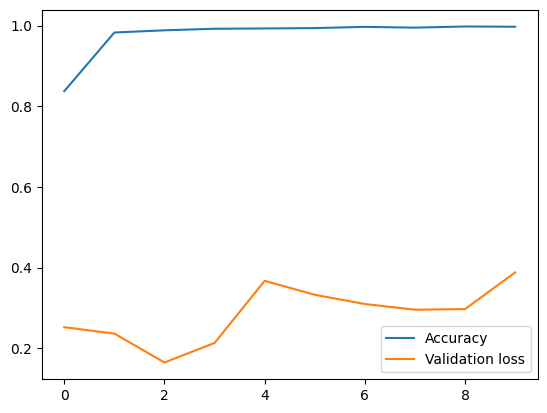

In [39]:
model = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv 16 filters 2 size**

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/1694 ━━━━━━━━━━━━━━━━━━━━ 2:26:30 5s/step - accuracy: 0.0000e+00 - loss: 4.8884

I0000 00:00:1719594977.622106     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1694/1694 ━━━━━━━━━━━━━━━━━━━━ 534s 313ms/step - accuracy: 0.7138 - loss: 1.2736 - val_accuracy: 0.9202 - val_loss: 0.2990
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.9893 - loss: 0.0480 - val_accuracy: 0.9325 - val_loss: 0.2142
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9936 - loss: 0.0259 - val_accuracy: 0.9388 - val_loss: 0.2500
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 144s 51ms/step - accuracy: 0.9972 - loss: 0.0114 - val_accuracy: 0.9042 - val_loss: 0.3670
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.9936 - loss: 0.0254 - val_accuracy: 0.9485 - val_loss: 0.1762
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.9556 - val_loss: 0.1602
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9964 - loss: 0.0126 - val_accuracy: 0.9517 - val_loss: 0.1908
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9976 - loss: 0

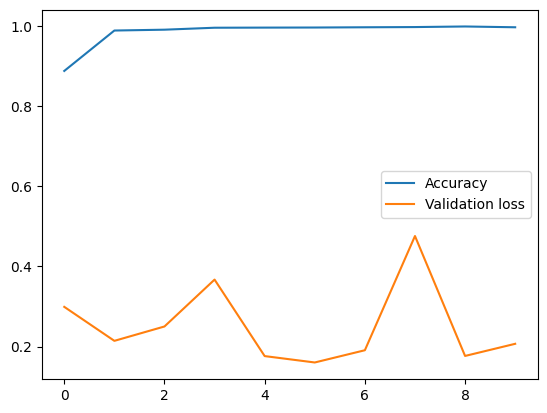

In [9]:
model = Sequential([
  layers.Conv2D(16, 2, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv with AveragePooling2D**

Epoch 1/10


2024-06-28 17:52:14.188223: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.28218, expected 2.66164
2024-06-28 17:52:14.188310: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.62377, expected 4.00323
2024-06-28 17:52:14.188322: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.56518, expected 3.94463
2024-06-28 17:52:14.188331: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.16639, expected 4.54585
2024-06-28 17:52:14.188341: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 4.22738, expected 3.60683
2024-06-28 17:52:14.188350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 36: 4.88607, expected 4.26553
2024-06-28 17:52:14.188360: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38: 4.62814, expected 4.0076
2024-06-28 17:52:14.188370: E external/local_xla/xl

 254/1694 ━━━━━━━━━━━━━━━━━━━━ 1:00 42ms/step - accuracy: 0.2210 - loss: 5.0748

2024-06-28 17:52:25.975259: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.19296, expected 2.25306
2024-06-28 17:52:25.975317: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.51379, expected 3.57389
2024-06-28 17:52:25.975327: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.06344, expected 5.12354
2024-06-28 17:52:25.975335: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.59934, expected 4.65944
2024-06-28 17:52:25.975344: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.91133, expected 4.97143
2024-06-28 17:52:25.975353: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.77539, expected 5.83549
2024-06-28 17:52:25.975361: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.15134, expected 6.21145
2024-06-28 17:52:25.975369: E external/local_xla/xla/se

1687/1694 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6648 - loss: 1.7651

2024-06-28 17:53:40.898740: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.7789, expected 2.30589
2024-06-28 17:53:40.898798: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.69817, expected 3.22516
2024-06-28 17:53:40.898817: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 2.60111, expected 2.12811
2024-06-28 17:53:40.898838: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 80: 3.56837, expected 3.09536
2024-06-28 17:53:40.898853: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 81: 3.41895, expected 2.94594
2024-06-28 17:53:40.898866: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 99: 3.67802, expected 3.20502
2024-06-28 17:53:40.898880: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100: 3.29663, expected 2.82362
2024-06-28 17:53:40.898896: E external/local_xla/x

1694/1694 ━━━━━━━━━━━━━━━━━━━━ 89s 51ms/step - accuracy: 0.6657 - loss: 1.7598 - val_accuracy: 0.8986 - val_loss: 0.3254
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9784 - loss: 0.0826 - val_accuracy: 0.9376 - val_loss: 0.2342
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.9901 - loss: 0.0410 - val_accuracy: 0.9394 - val_loss: 0.2057
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9928 - loss: 0.0288 - val_accuracy: 0.9539 - val_loss: 0.1642
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9921 - loss: 0.0286 - val_accuracy: 0.9398 - val_loss: 0.2229
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9905 - loss: 0.0378 - val_accuracy: 0.9327 - val_loss: 0.2979
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9939 - loss: 0.0239 - val_accuracy: 0.9355 - val_loss: 0.3375
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9977 - loss: 0.00

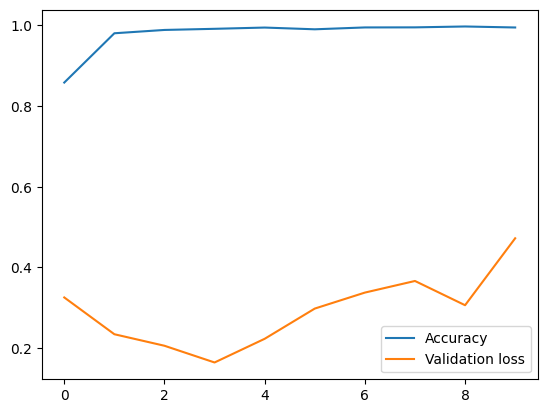

In [11]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.AveragePooling2D(2),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv with sgd**

Epoch 1/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.2466 - loss: 3.2227 - val_accuracy: 0.6627 - val_loss: 1.2541
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 93s 55ms/step - accuracy: 0.7718 - loss: 0.8043 - val_accuracy: 0.8337 - val_loss: 0.6589
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 91s 53ms/step - accuracy: 0.8986 - loss: 0.3692 - val_accuracy: 0.8617 - val_loss: 0.5857
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9414 - loss: 0.2239 - val_accuracy: 0.8685 - val_loss: 0.4938
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 140s 49ms/step - accuracy: 0.9689 - loss: 0.1305 - val_accuracy: 0.8996 - val_loss: 0.4241
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.9796 - loss: 0.0910 - val_accuracy: 0.9002 - val_loss: 0.4431
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9864 - loss: 0.0638 - val_accuracy: 0.9047 - val_loss: 0.3873
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 145s 50ms/step - accuracy: 0.9907

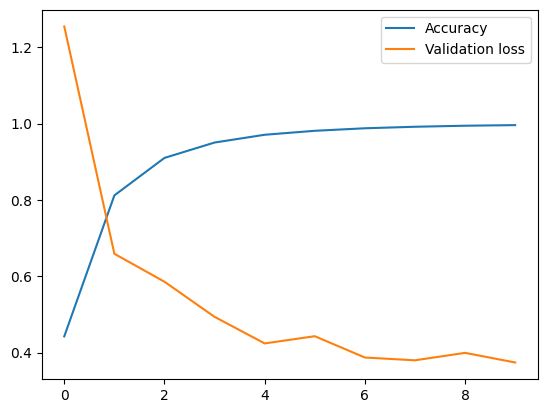

In [14]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv with nesterov sgd**

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.2879 - loss: 2.9808 - val_accuracy: 0.7232 - val_loss: 0.9883
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8277 - loss: 0.6272 - val_accuracy: 0.8034 - val_loss: 0.6899
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9260 - loss: 0.2776 - val_accuracy: 0.8708 - val_loss: 0.4610
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9602 - loss: 0.1598 - val_accuracy: 0.8897 - val_loss: 0.3815
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9758 - loss: 0.1052 - val_accuracy: 0.9114 - val_loss: 0.3257
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.9830 - loss: 0.0764 - val_accuracy: 0.9164 - val_loss: 0.3301
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9859 - loss: 0.0656 - val_accuracy: 0.9276 - val_loss: 0.2891
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9931 - loss: 0.04

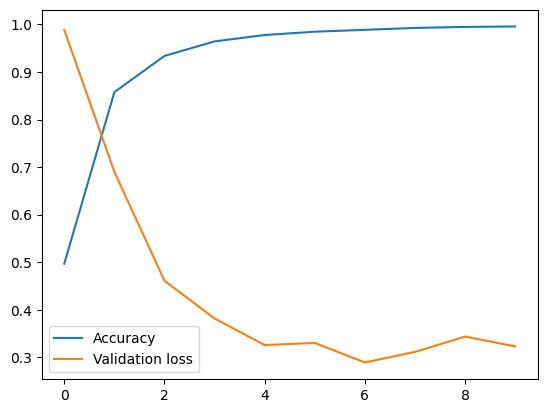

In [15]:
from tensorflow.keras.optimizers import SGD

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer=SGD(nesterov=True),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv with rmsprop**

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-06-29 16:44:27.523669: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.28218, expected 2.66164
2024-06-29 16:44:27.523725: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.62377, expected 4.00323
2024-06-29 16:44:27.523735: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.56518, expected 3.94463
2024-06-29 16:44:27.523743: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.16639, expected 4.54585
2024-06-29 16:44:27.523751: E external/local_xla/xla/service/gpu/buffer_comparator.cc:

   1/1694 ━━━━━━━━━━━━━━━━━━━━ 2:21:33 5s/step - accuracy: 0.0000e+00 - loss: 4.9470

I0000 00:00:1719679468.966825     136 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1286/1694 ━━━━━━━━━━━━━━━━━━━━ 1:29 219ms/step - accuracy: 0.5866 - loss: 1.9283

2024-06-29 16:49:10.497886: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.19296, expected 2.25306
2024-06-29 16:49:10.497954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.51379, expected 3.57389
2024-06-29 16:49:10.497964: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.06344, expected 5.12354
2024-06-29 16:49:10.497972: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.59934, expected 4.65944
2024-06-29 16:49:10.497980: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.91133, expected 4.97143
2024-06-29 16:49:10.497988: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.77539, expected 5.83549
2024-06-29 16:49:10.497996: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.15134, expected 6.21145
2024-06-29 16:49:10.498004: E external/local_xla/xla/se

1687/1694 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.6413 - loss: 1.6433

2024-06-29 16:52:04.956176: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.7789, expected 2.30589
2024-06-29 16:52:04.956242: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.69817, expected 3.22516
2024-06-29 16:52:04.956253: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 2.60111, expected 2.12811
2024-06-29 16:52:04.956262: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 80: 3.56837, expected 3.09536
2024-06-29 16:52:04.956271: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 81: 3.41895, expected 2.94594
2024-06-29 16:52:04.956281: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 99: 3.67802, expected 3.20502
2024-06-29 16:52:04.956290: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100: 3.29663, expected 2.82362
2024-06-29 16:52:04.956301: E external/local_xla/x

1694/1694 ━━━━━━━━━━━━━━━━━━━━ 461s 270ms/step - accuracy: 0.6422 - loss: 1.6386 - val_accuracy: 0.9106 - val_loss: 0.3359
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9802 - loss: 0.0696 - val_accuracy: 0.9205 - val_loss: 0.2985
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9933 - loss: 0.0249 - val_accuracy: 0.9241 - val_loss: 0.2860
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9967 - loss: 0.0124 - val_accuracy: 0.9345 - val_loss: 0.2696
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9984 - loss: 0.0065 - val_accuracy: 0.9401 - val_loss: 0.2606
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9505 - val_loss: 0.2023
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9484 - val_loss: 0.2637
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 143s 49ms/step - accuracy: 0.9994 - loss: 0

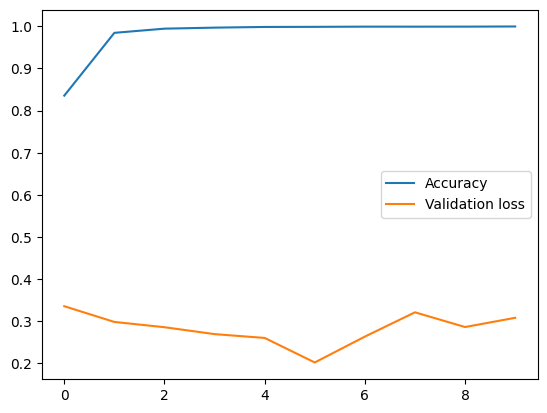

In [9]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

**1 conv with KLDivergence loss**

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-06-30 16:19:35.495466: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.28218, expected 2.66164
2024-06-30 16:19:35.495727: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.62377, expected 4.00323
2024-06-30 16:19:35.495779: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.56518, expected 3.94463
2024-06-30 16:19:35.495806: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.16639, expected 4.54585
2024-06-30 16:19:35.495832: E external/local_xla/xla/service/gpu/buffer_comparator.cc:

   1/1694 ━━━━━━━━━━━━━━━━━━━━ 2:24:30 5s/step - accuracy: 0.0312 - loss: 5.0012

I0000 00:00:1719764376.989885     132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1456/1694 ━━━━━━━━━━━━━━━━━━━━ 51s 215ms/step - accuracy: 0.6542 - loss: 2.4559

2024-06-30 16:24:50.103824: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.19296, expected 2.25306
2024-06-30 16:24:50.103877: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.51379, expected 3.57389
2024-06-30 16:24:50.103887: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.06344, expected 5.12354
2024-06-30 16:24:50.103895: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.59934, expected 4.65944
2024-06-30 16:24:50.103902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.91133, expected 4.97143
2024-06-30 16:24:50.103910: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.77539, expected 5.83549
2024-06-30 16:24:50.103917: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.15134, expected 6.21145
2024-06-30 16:24:50.103925: E external/local_xla/xla/se

1687/1694 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.6841 - loss: 2.2190

2024-06-30 16:27:15.210475: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.7789, expected 2.30589
2024-06-30 16:27:15.210551: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.69817, expected 3.22516
2024-06-30 16:27:15.210561: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 2.60111, expected 2.12811
2024-06-30 16:27:15.210569: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 80: 3.56837, expected 3.09536
2024-06-30 16:27:15.210577: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 81: 3.41895, expected 2.94594
2024-06-30 16:27:15.210585: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 99: 3.67802, expected 3.20502
2024-06-30 16:27:15.210592: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100: 3.29663, expected 2.82362
2024-06-30 16:27:15.210602: E external/local_xla/x

1694/1694 ━━━━━━━━━━━━━━━━━━━━ 464s 271ms/step - accuracy: 0.6850 - loss: 2.2117 - val_accuracy: 0.8943 - val_loss: 0.3842
Epoch 2/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9857 - loss: 0.0522 - val_accuracy: 0.9442 - val_loss: 0.1985
Epoch 3/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9909 - loss: 0.0394 - val_accuracy: 0.9427 - val_loss: 0.2120
Epoch 4/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9941 - loss: 0.0209 - val_accuracy: 0.9096 - val_loss: 0.3527
Epoch 5/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9935 - loss: 0.0267 - val_accuracy: 0.8999 - val_loss: 0.3888
Epoch 6/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 88s 52ms/step - accuracy: 0.9948 - loss: 0.0185 - val_accuracy: 0.9464 - val_loss: 0.2501
Epoch 7/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9982 - loss: 0.0070 - val_accuracy: 0.8843 - val_loss: 0.5639
Epoch 8/10
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9923 - loss: 0.

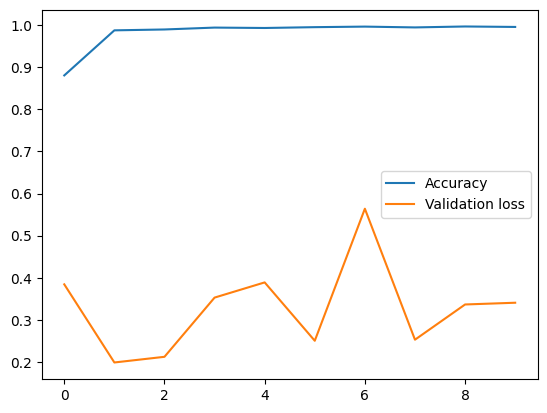

In [9]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (100,100,3)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(131,activation='softmax')
])

model.compile(optimizer='adam',
              loss='KLDivergence',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
  validation_data=valid_generator,
  epochs=10
)

model.evaluate(test_generator)

plt.plot(history.epoch,history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch,history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()